In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import geopandas as gpd
from shapely import wkt
import osmnx as ox
import networkx as nx

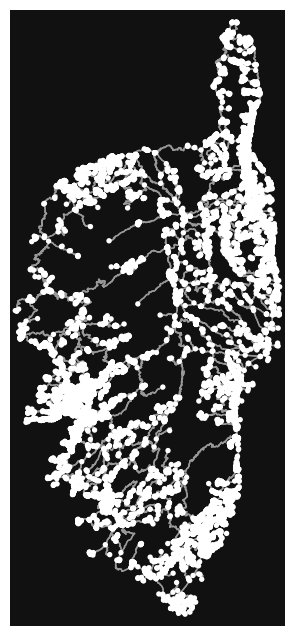

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
place_name='Corse, France'
G_osm=ox.graph_from_place(place_name,network_type='drive')
crs=ox.graph_to_gdfs(G_osm,edges=False).estimate_utm_crs()
G_osm=ox.project_graph(G_osm,to_crs=crs)


ox.plot_graph(G_osm)


In [3]:
GENERATE=True
navigation_df_path='./navigation_df.csv'
navigation_df=pd.read_csv(navigation_df_path)
navigation_df['geometry']=navigation_df['geometry'].apply(wkt.loads)
navigation_df=gpd.GeoDataFrame(navigation_df,geometry='geometry',crs='epsg:4326')
navigation_df['time']=pd.to_datetime(navigation_df['time'])
navigation_df['edge']=navigation_df['edge'].apply(eval)

In [4]:
nodes_elevation_data_path='./nodes_elevation_data.p'
edges_elevation_data_path='./edges_elevation_data.p'

with open(nodes_elevation_data_path,'rb') as file:
    nodes_elevation_data=pickle.load(file)
with open(edges_elevation_data_path,'rb') as file:
    edges_elevation_data=pickle.load(file)

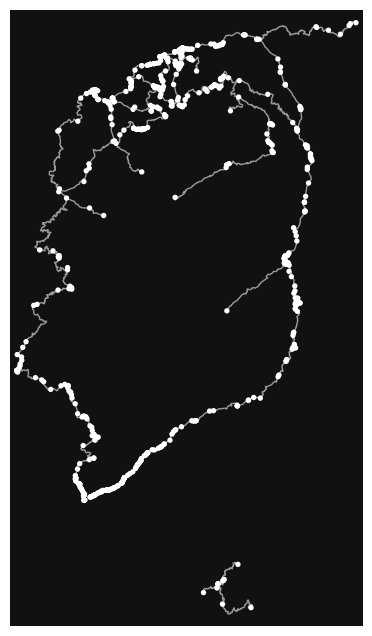

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
ox.plot_graph(nx.edge_subgraph(G_osm,edges_elevation_data.keys()))

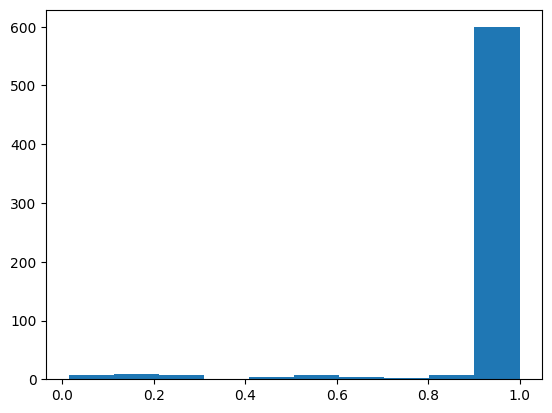

In [6]:
_=plt.hist([elem['cover'] for L in edges_elevation_data.values() for elem in L])

In [7]:
edges=sorted(edges_elevation_data.keys(),key=lambda edge:len(navigation_df[(navigation_df.edge==edge)|(navigation_df.edge==(edge[1],edge[0],edge[2]))]))

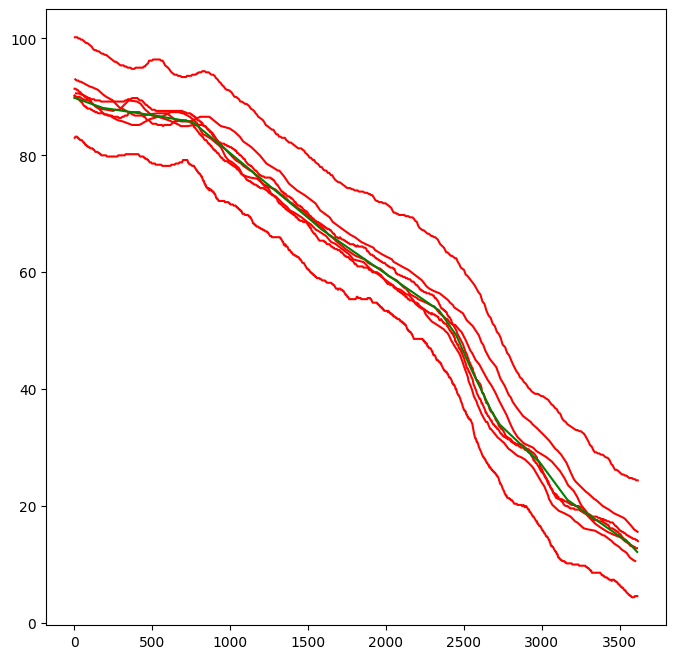

In [23]:
plt.rcParams['figure.figsize']=(8,8)
edge=edges[-17]
edge_df=navigation_df[navigation_df.edge==edge]
for _,segment_df in edge_df.groupby(['file_path','segment']):
    plt.plot(segment_df['edge_coordinate'],segment_df['elevation'],c='r')
length=G_osm.get_edge_data(*edge)['length']
edge_df=navigation_df[navigation_df.edge==(edge[1],edge[0],edge[2])]
for _,segment_df in edge_df.groupby(['file_path','segment']):
    plt.plot(length-segment_df['edge_coordinate'],segment_df['elevation'],c='r')


edge_elevation_datum=edges_elevation_data[edge][0]
X,Y=edge_elevation_datum['X'],edge_elevation_datum['Y']
plt.plot(X,Y,c='g')